In [63]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
import graphviz
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

In [64]:
data = pd.read_csv('test2.csv', delimiter=',')

#data = pd.read_csv('bank.csv', delimiter=';')

x = data[['x1', 'x2']].values
y = data['y1'].values

#x = data[['age', 'balance']].values
#y = data['housing'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Bagging

In [65]:
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=200, random_state=42)
bagging.fit(x_train, y_train)

c:\Users\dong5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=200,
                  random_state=42)

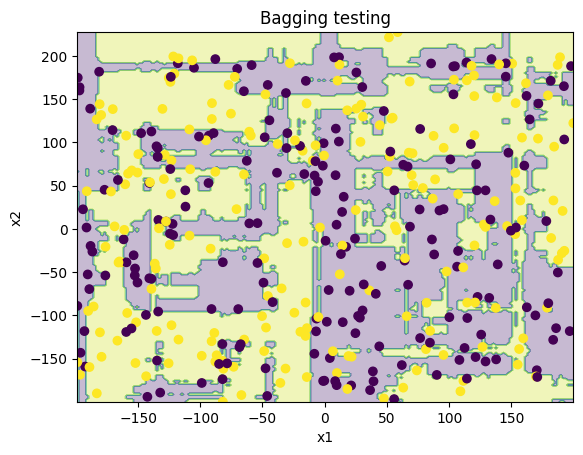

In [66]:
x2, y2 = np.meshgrid(np.linspace(x[:, 0].min(), x[:, 0].max(), 200), np.linspace(x[:, 1].min(), x[:, 1].max(), 200))

z = bagging.predict(np.c_[x2.ravel(), y2.ravel()])
z = z.reshape(x2.shape)

plt.contourf(x2, y2, z, alpha=0.3)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Bagging testing')
plt.show()

# Boosting

In [67]:
base_estimator = DecisionTreeClassifier(max_depth=2, random_state=42)
boosting = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=80, random_state=42)
boosting.fit(x_train, y_train)

c:\Users\dong5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=42),
                   n_estimators=80, random_state=42)

In [68]:
y_pred = boosting.predict(x_test)
boost_score = accuracy_score(y_test, y_pred)
boost_score

0.5125

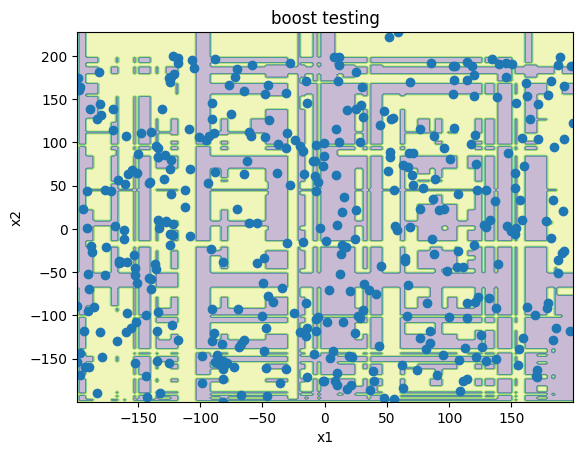

In [69]:
x2 , y2 = np.meshgrid(np.linspace(x[:, 0].min(), x[:, 0].max(), 200),np.linspace(x[:, 1].min(), x[:, 1].max(), 200))

z = boosting.predict(np.c_[x2.ravel(), y2.ravel()])
z = z.reshape(x2.shape)

plt.contourf(x2, y2, z, alpha=0.3)
plt.scatter(x[:, 0], x[:, 1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('boost testing')
plt.show()

In [70]:
import lightgbm as lgb
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test, reference=train_data)
params = {'objective': 'binary','metric': 'binary_logloss','boosting_type': 'gbdt','num_leaves': 31,'learning_rate': 0.05,'feature_fraction': 1.0}

lgb1 = lgb.LGBMClassifier(**params)
lgb1.fit(x_train, y_train)

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Info] Number of positive: 159, number of negative: 161
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 216
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496875 -> initscore=-0.012500
[LightGBM] [Info] Start training from score -0.012500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

LGBMClassifier(feature_fraction=1.0, learning_rate=0.05,
               metric='binary_logloss', objective='binary')

In [71]:
y_pred = lgb1.predict(x_test)
lgb_score = accuracy_score(y_test, y_pred)
lgb_score

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0


0.55

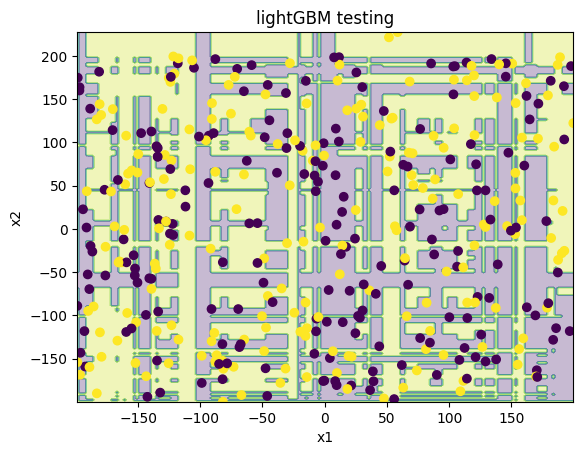

In [72]:
x2 , y2 = np.meshgrid(np.linspace(x[:, 0].min(), x[:, 0].max(), 200),np.linspace(x[:, 1].min(), x[:, 1].max(), 200))

z = boosting.predict(np.c_[x2.ravel(), y2.ravel()])
z = z.reshape(x2.shape)

plt.contourf(x2, y2, z, alpha=0.3)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('lightGBM testing')
plt.show()


# Stacking

In [73]:
from sklearn.ensemble import StackingClassifier

estimators = [('dt', DecisionTreeClassifier(random_state=42)),('lr', LogisticRegression(random_state=42)),('svc', SVC(probability=True, random_state=42))
]

In [74]:
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)
stacking

StackingClassifier(cv=5,
                   estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                               ('lr', LogisticRegression(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=LogisticRegression())

In [75]:
stacking.fit(x_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                               ('lr', LogisticRegression(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=LogisticRegression())

In [76]:
x2 , y2 = np.meshgrid(np.linspace(x[:, 0].min(), x[:, 0].max(), 200),np.linspace(x[:, 1].min(), x[:, 1].max(), 200))
z = stacking.predict(np.c_[x2.ravel(), y2.ravel()])
z = z.reshape(x2.shape)
stack_pred = stacking.predict(x_test)
stack_score = accuracy_score(y_test, stack_pred)
stack_score


0.475

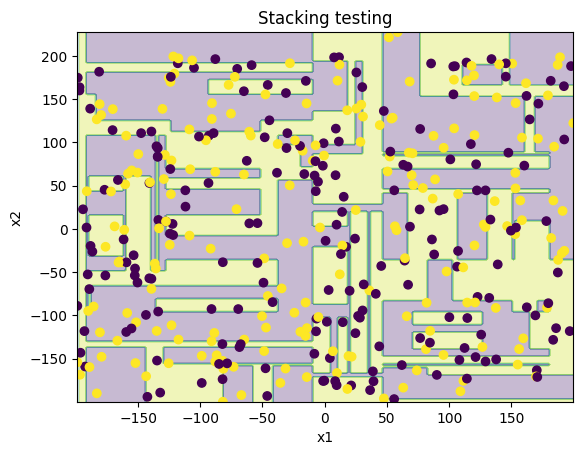

In [77]:
plt.contourf(x2, y2, z, alpha=0.3)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Stacking testing')
plt.show()